# Bibliotecas


In [1]:
import pandas as pd
from numpy import True_
from sklearn.preprocessing import StandardScaler


# Tratamento das tabelas


In [2]:

#Adicão das tabelas que será consumida pela aplicação

url_tabela_escolaridade = 'https://raw.githubusercontent.com/Gabr1elFraga//Agrupamento-de-Cidades-por-Indicadores-Socioeconomicos/main/escolaridade_municipios_2022.xlsx'
url_tabela_pib = 'https://raw.githubusercontent.com/Gabr1elFraga//Agrupamento-de-Cidades-por-Indicadores-Socioeconomicos/main/pib_municipios_2022.xlsx'
url_tabela_populacaokm = 'https://raw.githubusercontent.com/Gabr1elFraga//Agrupamento-de-Cidades-por-Indicadores-Socioeconomicos/main/populacao-km_2022.xlsx'
url_tabela_populacao = 'https://raw.githubusercontent.com/Gabr1elFraga//Agrupamento-de-Cidades-por-Indicadores-Socioeconomicos/main/populacao_2022.xlsx'
url_tabela_ocupacao = 'https://raw.githubusercontent.com/Gabr1elFraga//Agrupamento-de-Cidades-por-Indicadores-Socioeconomicos/main/porcentagem_ocupacao_2022.xlsx'


#Criação de uma tabela unica com todos os dados

#Calculo do PIB per Capita
df_pib = pd.read_excel(url_tabela_pib, skiprows = 3)
df_populacao = pd.read_excel(url_tabela_populacao, skiprows = 3)

df_pib.rename(columns = {df_pib.columns[0]: 'id', df_pib.columns[1]: 'nome_cidade', df_pib.columns[2]: 'pib'}, inplace=True_)
df_populacao.rename(columns = {df_populacao.columns[0]: 'id', df_populacao.columns[1]: 'nome_cidade_populacao', df_populacao.columns[2]: 'populacao'}, inplace=True)

df_pib['id'] = df_pib['id'].astype(str).str.strip()
df_populacao['id'] = df_populacao['id'].astype(str).str.strip()

df_pib_per_capita = pd.merge(df_pib[['id', 'nome_cidade', 'pib']],
                             df_populacao[['id', 'populacao']],
                             on = 'id')

df_pib_per_capita['pib_per_capita'] = (df_pib_per_capita['pib']*1000) /df_pib_per_capita['populacao']

df_pib_per_capita = df_pib_per_capita.drop(columns = ['pib', 'populacao'])

#PIB + Desemprego

df_ocupacao = pd.read_excel(url_tabela_ocupacao, skiprows = 5)
df_ocupacao.rename(columns = {df_ocupacao.columns[0]: 'id', df_ocupacao.columns[1]: 'nome_cidade_ocupacao', df_ocupacao.columns[2]: 'condicao', df_ocupacao.columns[3]: 'grupo_ocupacao', df_ocupacao.columns[4]: 'porcentagem_desemprego'}, inplace=True)

df_pib_per_capita['id'] = df_pib_per_capita['id'].astype(str).str.strip()
df_ocupacao['id'] = df_ocupacao['id'].astype(str).str.strip()

df_pib_per_capita_ocupacao = pd.merge (df_pib_per_capita[['id', 'nome_cidade' , 'pib_per_capita']],
                                         df_ocupacao[['id', 'porcentagem_desemprego']],
                                         on = 'id')
# PIB + Desemprego + Escolaridade

df_escolaridade = pd.read_excel(url_tabela_escolaridade, skiprows = 5)
df_escolaridade.rename(columns = {df_escolaridade.columns[0]: 'id', df_escolaridade.columns[1]: 'nome_cidade_escolaridade', df_escolaridade.columns[2]: 'sexo', df_escolaridade.columns[3]: 'cor_raca', df_escolaridade.columns[4]: 'sem_instrucao_e_fundamental_incompleto', df_escolaridade.columns[5]: 'fundamental_completo_e_medio_incompleto', df_escolaridade.columns[6]: 'medio_completo_e_superior_incompleto', df_escolaridade.columns[7]: 'superior_completo'}, inplace=True)

df_pib_per_capita_ocupacao['id'] = df_pib_per_capita_ocupacao['id'].astype(str).str.strip()
df_escolaridade['id'] = df_escolaridade['id'].astype(str).str.strip()

df_pib_per_capita_ocupacao_escolaridade = pd.merge (df_pib_per_capita_ocupacao[['id','nome_cidade', 'pib_per_capita', 'porcentagem_desemprego']],
                                                    df_escolaridade[['id', 'sem_instrucao_e_fundamental_incompleto', 'fundamental_completo_e_medio_incompleto', 'medio_completo_e_superior_incompleto', 'superior_completo']],
                                                    on = 'id')

#Tabela final (PIB + Desemprego + Escolaridade + Densidade_Populacional)
df_densidade_populacional = pd.read_excel(url_tabela_populacaokm, skiprows = 3)
df_densidade_populacional.rename(columns = {df_densidade_populacional.columns[0]: 'id', df_densidade_populacional.columns[1]: 'nome_cidade_densidade', df_densidade_populacional.columns[2]: 'densidade_populacional'}, inplace=True)

df_pib_per_capita_ocupacao_escolaridade['id'] = df_pib_per_capita_ocupacao_escolaridade['id'].astype(str).str.strip()
df_densidade_populacional['id'] = df_densidade_populacional['id'].astype(str).str.strip()

df_total = pd.merge (df_pib_per_capita_ocupacao_escolaridade[['id', 'nome_cidade', 'pib_per_capita', 'porcentagem_desemprego', 'sem_instrucao_e_fundamental_incompleto', 'fundamental_completo_e_medio_incompleto', 'medio_completo_e_superior_incompleto', 'superior_completo']],
                     df_densidade_populacional[['id', 'densidade_populacional']],
                     on = 'id')



#print (df_pib.head())
#print (df_populacao.head())
#print (df_pib_per_capita.head())
#print (df_ocupacao.head())
#print (df_pib_per_capita_ocupacao.head())
#print (df_escolaridade.head())
#print(df_pib_per_capita_ocupacao_escolaridade.head())
#print(df_densidade_populacional.head())

print(df_total.head())


        id                 nome_cidade  pib_per_capita  \
0  1100015  Alta Floresta D'Oeste (RO)    42780.310784   
1  1100023              Ariquemes (RO)    39339.429740   
2  1100031                 Cabixi (RO)    54154.924313   
3  1100049                 Cacoal (RO)    36777.527133   
4  1100056             Cerejeiras (RO)    56834.424166   

   porcentagem_desemprego  sem_instrucao_e_fundamental_incompleto  \
0                   47.50                                   54.47   
1                   38.29                                   37.21   
2                   41.27                                   53.41   
3                   32.34                                   36.92   
4                   34.17                                   40.20   

   fundamental_completo_e_medio_incompleto  \
0                                    16.97   
1                                    15.99   
2                                    10.24   
3                                    16.74   
4     

# Normalização de Dados

In [3]:

# Colunas para a normalização
colunas_para_normalizar = [
    'pib_per_capita',
    'porcentagem_desemprego',
    'sem_instrucao_e_fundamental_incompleto',
    'fundamental_completo_e_medio_incompleto',
    'medio_completo_e_superior_incompleto',
    'superior_completo',
    'densidade_populacional'
]

# Remover linhas vazias que podem quebrar a normalização
df_total = df_total.dropna(subset=colunas_para_normalizar)

# Normalizando
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(df_total[colunas_para_normalizar])

df_total_normalizado = df_total.copy()
df_total_normalizado[colunas_para_normalizar] = dados_normalizados

print("Tabela normalizada com sucesso! Veja como ficou:")
print(df_total_normalizado.tail())

Tabela normalizada com sucesso! Veja como ficou:
           id          nome_cidade  pib_per_capita  porcentagem_desemprego  \
5565  5222005      Vianópolis (GO)        0.667875                0.164440   
5566  5222054  Vicentinópolis (GO)        1.103182               -0.624471   
5567  5222203        Vila Boa (GO)        0.230568               -0.504828   
5568  5222302   Vila Propício (GO)        1.018483               -0.057233   
5569  5300108        Brasília (DF)        1.941383               -0.993722   

      sem_instrucao_e_fundamental_incompleto  \
5565                               -0.340378   
5566                               -0.315182   
5567                                0.200845   
5568                                0.561660   
5569                               -2.802591   

      fundamental_completo_e_medio_incompleto  \
5565                                 0.239284   
5566                                 0.832477   
5567                                 0.148858 

# Novas bibliotecas necessárias para o metodo do cotovelo

In [4]:
!pip install geopandas matplotlib seaborn --quiet

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

print("Bibliotecas instaladas e importadas com sucesso!")

Bibliotecas instaladas e importadas com sucesso!


# Método do Cotovelo para Encontrar o K Ideal

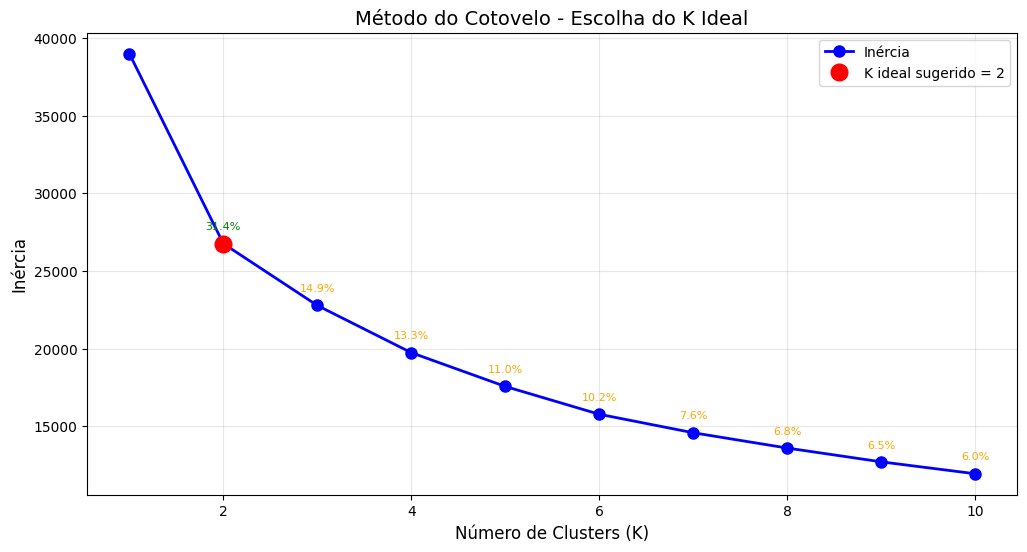

📊 Análise do gráfico:
   • K ideal sugerido: 2
   • Inércia em K=2: 26757.25
   • Melhoria de K=1 para K=2: 31.4%
   • Melhoria de K=2 para K=3: 14.9%

💡 Dica: O K ideal é onde a queda da inércia começa a desacelerar significativamente.


In [25]:
# Preparar os dados normalizados
if isinstance(dados_normalizados, pd.DataFrame):
    X = dados_normalizados.values
else:
    X = dados_normalizados

# Calcular inércia para diferentes valores de K
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Calcular a diferença percentual entre pontos consecutivos
diferencas = []
for i in range(1, len(inertias)):
    # Diferença percentual em relação ao ponto anterior
    diff_percentual = (inertias[i-1] - inertias[i]) / inertias[i-1] * 100
    diferencas.append(diff_percentual)

# Encontrar o ponto de "cotovelo" (onde a diferença começa a estabilizar)
# Método simples: encontrar onde a diferença percentual cai abaixo de um threshold
threshold = 15  # 15% de melhoria
k_ideal = 2  # valor padrão

for i, diff in enumerate(diferencas):
    if diff < threshold:
        k_ideal = i + 1  # +1 porque diferencas[0] corresponde a k=2
        break

# Plotar gráfico com destaque
plt.figure(figsize=(12, 6))

# Plotar a curva principal
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8, label='Inércia')

# Destacar o ponto ideal
plt.plot(k_ideal, inertias[k_ideal-1], 'ro', markersize=12, label=f'K ideal sugerido = {k_ideal}')

# Adicionar anotações
for i, (k, inercia) in enumerate(zip(K_range, inertias)):
    if i > 0:  # Pular o primeiro ponto
        diff = diferencas[i-1]
        cor = 'green' if diff > threshold else 'orange'
        plt.annotate(f'{diff:.1f}%', (k, inercia),
                    textcoords="offset points", xytext=(0,10),
                    ha='center', fontsize=8, color=cor)

plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Inércia', fontsize=12)
plt.title('Método do Cotovelo - Escolha do K Ideal', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"📊 Análise do gráfico:")
print(f"   • K ideal sugerido: {k_ideal}")
print(f"   • Inércia em K={k_ideal}: {inertias[k_ideal-1]:.2f}")
print(f"   • Melhoria de K={k_ideal-1} para K={k_ideal}: {diferencas[k_ideal-2]:.1f}%" if k_ideal > 1 else "")
print(f"   • Melhoria de K={k_ideal} para K={k_ideal+1}: {diferencas[k_ideal-1]:.1f}%" if k_ideal < 10 else "")
print("\n💡 Dica: O K ideal é onde a queda da inércia começa a desacelerar significativamente.")

# Aplicação do K-means

In [6]:
NUM_CLUSTERS = 4

# Aplicar K-Means
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42, n_init=10)
labels_clusters = kmeans.fit_predict(X)

# Adicionar clusters aos DataFrames
df_total['cluster'] = labels_clusters
df_total_normalizado['cluster'] = labels_clusters

print(f"K-Means aplicado com {NUM_CLUSTERS} clusters!")
print("\nDistribuição das cidades por cluster:")
print(df_total['cluster'].value_counts().sort_index())

K-Means aplicado com 4 clusters!

Distribuição das cidades por cluster:
cluster
0    1059
1    2178
2    2292
3      41
Name: count, dtype: int64


# Análise Estatística dos Clusters

In [24]:
# Estatísticas descritivas por cluster
print("=" * 80)
print("PERFIL MÉDIO DOS CLUSTERS (DADOS ORIGINAIS)")
print("=" * 80)

# Média das variáveis por cluster
perfil_clusters = df_total.groupby('cluster')[colunas_para_normalizar].mean().round(2)
display(perfil_clusters)

print("\n" + "=" * 80)
print("DESVIO PADRÃO POR CLUSTER")
print("=" * 80)
desvio_clusters = df_total.groupby('cluster')[colunas_para_normalizar].std().round(2)
display(desvio_clusters)

print("\n" + "=" * 80)
print("NÚMERO DE CIDADES POR CLUSTER")
print("=" * 80)
print(df_total['cluster'].value_counts().sort_index())

# Interpretação dos clusters
print("\n" + "=" * 80)
print("INTERPRETAÇÃO DOS CLUSTERS")
print("=" * 80)

for cluster in range(NUM_CLUSTERS):
    cidades_cluster = df_total[df_total['cluster'] == cluster]['nome_cidade'].tolist()
    print(f"\nCluster {cluster}: {len(cidades_cluster)} cidades")
    print(f"Exemplos: {', '.join(cidades_cluster[:5])}...")

PERFIL MÉDIO DOS CLUSTERS (DADOS ORIGINAIS)


,pib_per_capita,porcentagem_desemprego,sem_instrucao_e_fundamental_incompleto,fundamental_completo_e_medio_incompleto,medio_completo_e_superior_incompleto,superior_completo,densidade_populacional
cluster,,,,,,,
0,67133.83,26.34,31.24,15.68,37.26,15.82,229.31
1,17942.71,57.41,54.37,13.97,24.93,6.73,32.42
2,40194.58,35.03,43.66,16.05,29.92,10.37,40.79
3,54055.05,27.72,22.56,15.02,42.51,19.92,5833.86


DESVIO PADRÃO POR CLUSTER


,pib_per_capita,porcentagem_desemprego,sem_instrucao_e_fundamental_incompleto,fundamental_completo_e_medio_incompleto,medio_completo_e_superior_incompleto,superior_completo,densidade_populacional
cluster,,,,,,,
0,72015.12,7.71,5.28,2.34,4.43,4.35,428.77
1,12421.99,10.85,4.94,2.48,4.25,1.94,49.96
2,27764.41,11.31,4.62,2.80,4.47,2.66,105.30
3,44108.80,5.44,4.65,2.71,4.31,9.28,3016.02


NÚMERO DE CIDADES POR CLUSTER
cluster
0    1059
1    2178
2    2292
3      41
Name: count, dtype: int64
INTERPRETAÇÃO DOS CLUSTERS
Cluster 0: 1059 cidades
Exemplos: Ji-Paraná (RO), Porto Velho (RO), Rolim de Moura (RO), Vilhena (RO), Rio Branco (AC)...
Cluster 1: 2178 cidades
Exemplos: Alta Floresta D'Oeste (RO), Cabixi (RO), Corumbiara (RO), Machadinho D'Oeste (RO), Santa Luzia D'Oeste (RO)...
Cluster 2: 2292 cidades
Exemplos: Ariquemes (RO), Cacoal (RO), Cerejeiras (RO), Colorado do Oeste (RO), Costa Marques (RO)...
Cluster 3: 41 cidades
Exemplos: Fortaleza (CE), Natal (RN), João Pessoa (PB), Olinda (PE), Paulista (PE)...


# Visualizações dos Clusters

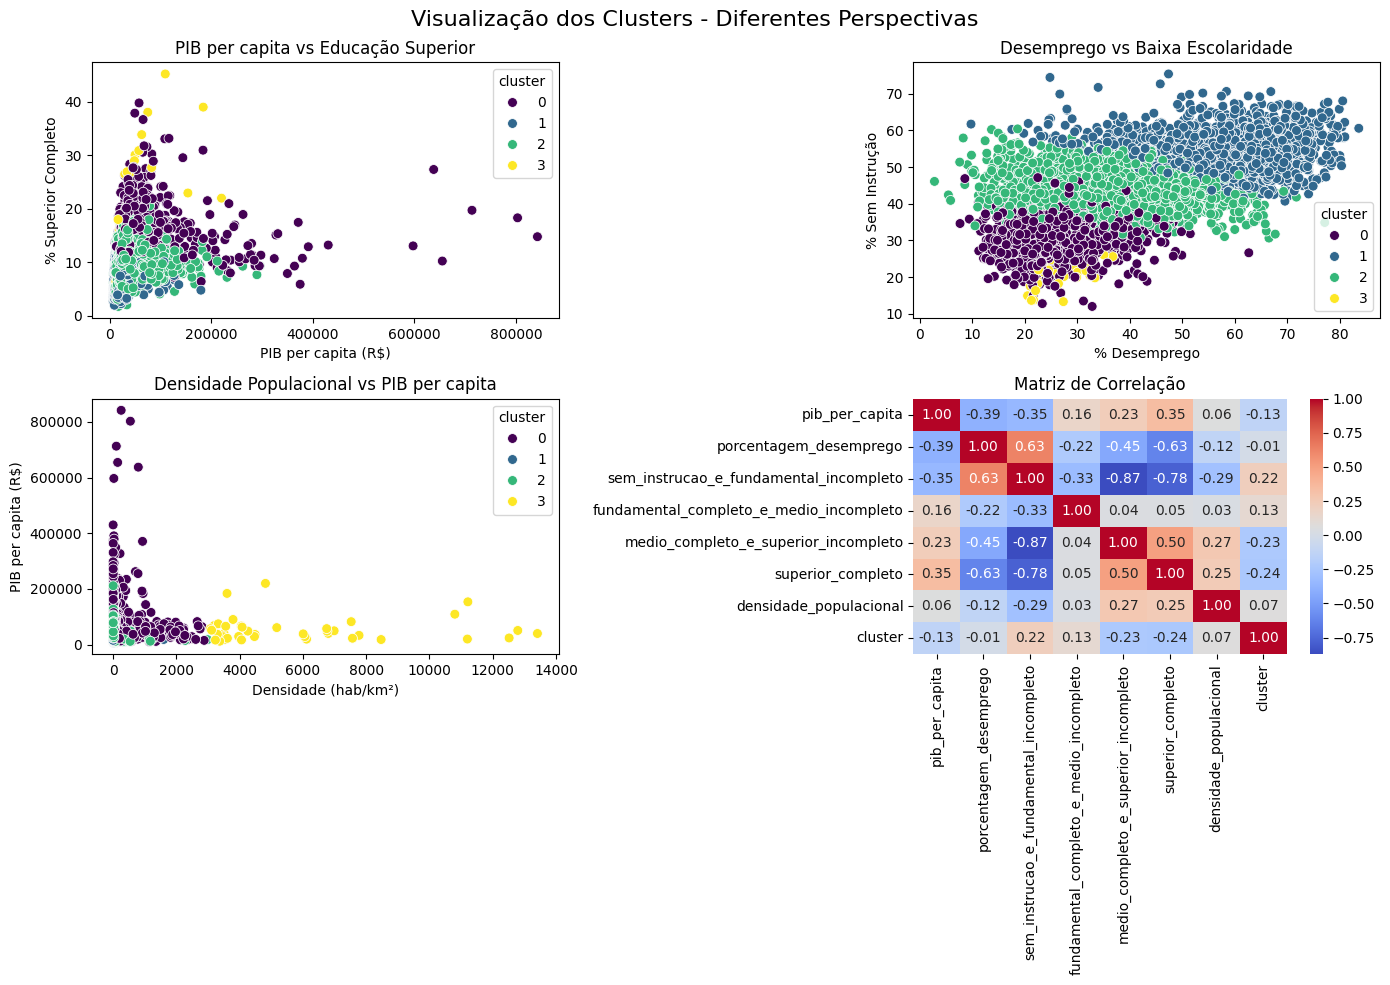

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Visualização dos Clusters - Diferentes Perspectivas', fontsize=16)

# Gráfico 1: PIB per capita vs Superior Completo
sns.scatterplot(data=df_total, x='pib_per_capita', y='superior_completo',
                hue='cluster', palette='viridis', ax=axes[0,0], s=50)
axes[0,0].set_title('PIB per capita vs Educação Superior')
axes[0,0].set_xlabel('PIB per capita (R$)')
axes[0,0].set_ylabel('% Superior Completo')

# Gráfico 2: Desemprego vs Sem Instrução
sns.scatterplot(data=df_total, x='porcentagem_desemprego', y='sem_instrucao_e_fundamental_incompleto',
                hue='cluster', palette='viridis', ax=axes[0,1], s=50)
axes[0,1].set_title('Desemprego vs Baixa Escolaridade')
axes[0,1].set_xlabel('% Desemprego')
axes[0,1].set_ylabel('% Sem Instrução')

# Gráfico 3: Densidade Populacional vs PIB per capita
sns.scatterplot(data=df_total, x='densidade_populacional', y='pib_per_capita',
                hue='cluster', palette='viridis', ax=axes[1,0], s=50)
axes[1,0].set_title('Densidade Populacional vs PIB per capita')
axes[1,0].set_xlabel('Densidade (hab/km²)')
axes[1,0].set_ylabel('PIB per capita (R$)')

# Gráfico 4: Mapa de calor das correlações
correlacoes = df_total[colunas_para_normalizar + ['cluster']].corr()
sns.heatmap(correlacoes, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Matriz de Correlação')

plt.tight_layout()
plt.show()

# Boxplots para Comparação entre Clusters

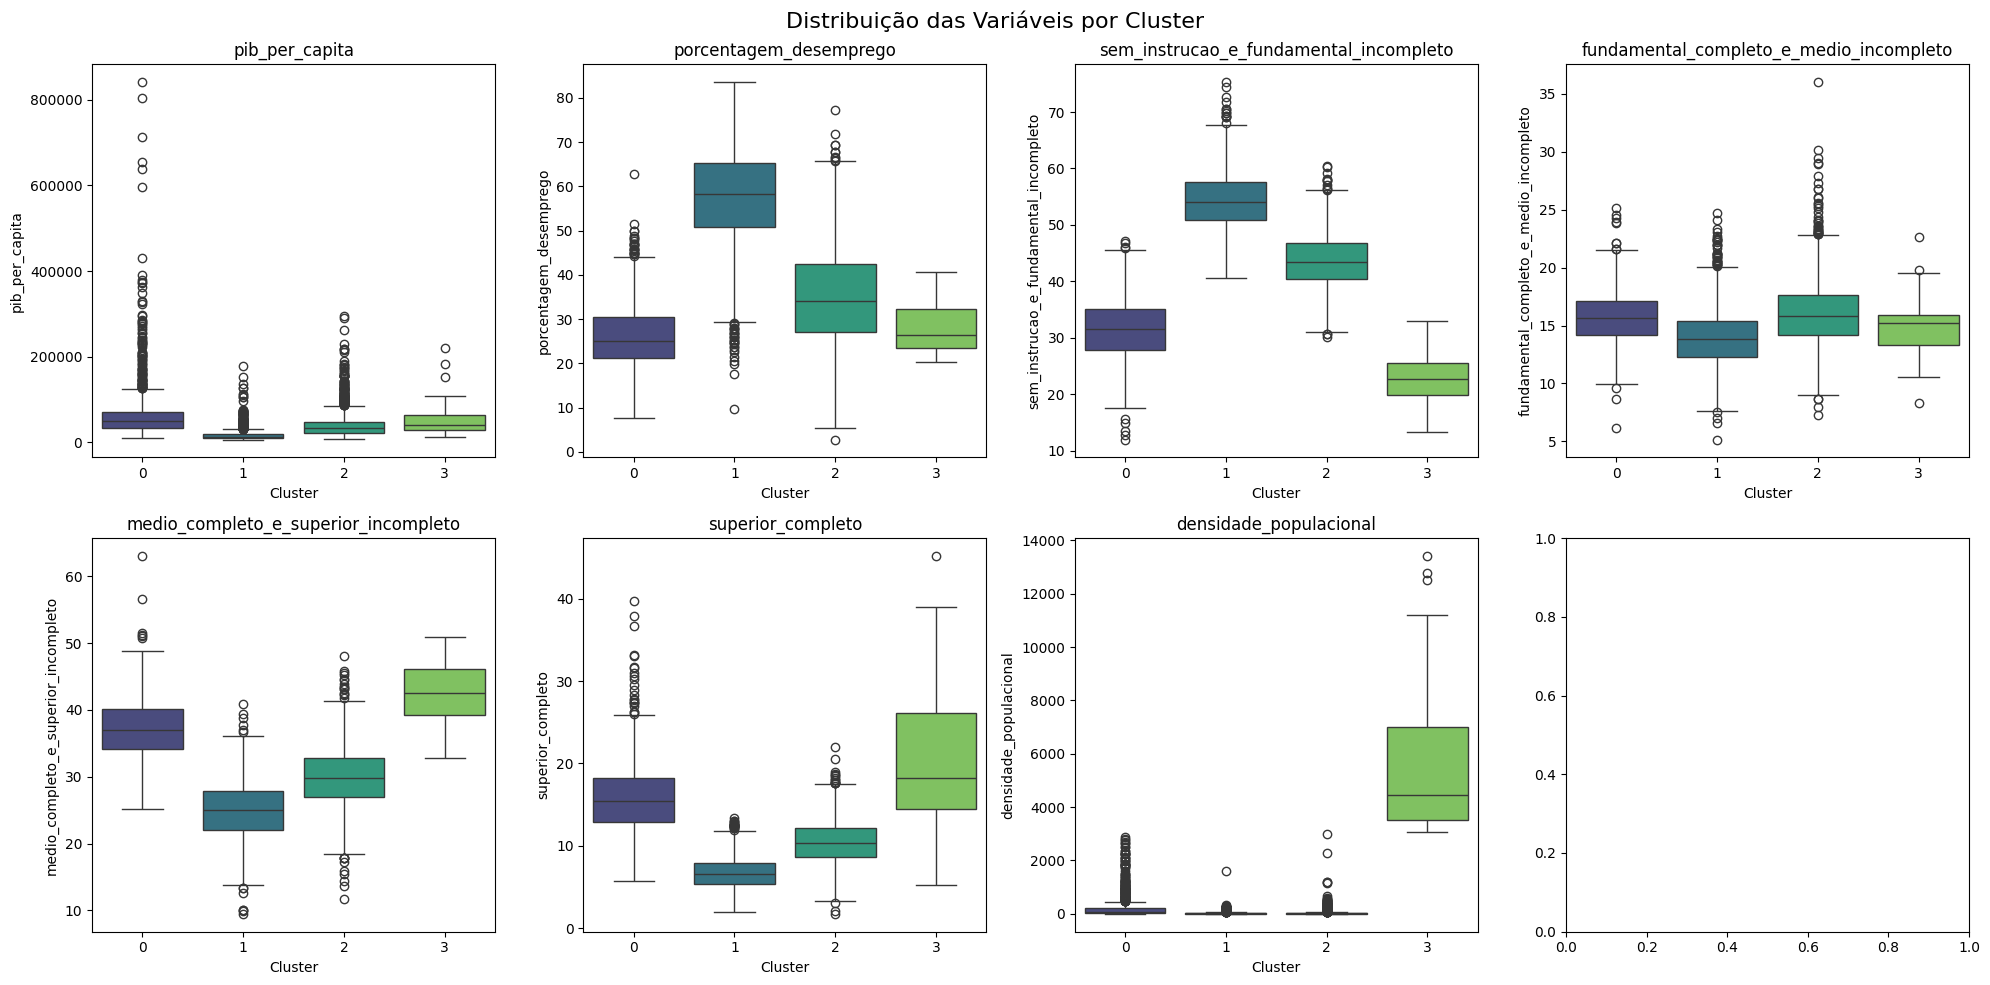

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribuição das Variáveis por Cluster', fontsize=16)

for i, coluna in enumerate(colunas_para_normalizar):
    row = i // 4
    col = i % 4
    sns.boxplot(data=df_total, x='cluster', y=coluna, ax=axes[row, col], palette='viridis')
    axes[row, col].set_title(f'{coluna}')
    axes[row, col].set_xlabel('Cluster')

plt.tight_layout()
plt.show()

# DESAFIO EXTRA: Mapa Temático dos Clusters

In [10]:
# @title Download e Preparação do Mapa

import geopandas as gpd
import requests
import zipfile
import os

print("Baixando mapa do Brasil (IBGE 2022)...")

# URL do mapa (verificar se está ativa)
url_mapa = 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2022/Brasil/BR/BR_Municipios_2022.zip'
arquivo_zip = 'BR_Municipios_2022.zip'

try:
    # Baixar o arquivo
    response = requests.get(url_mapa, stream=True)
    with open(arquivo_zip, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)

    # Extrair
    with zipfile.ZipFile(arquivo_zip, 'r') as zip_ref:
        zip_ref.extractall('mapa_br')

    print("Download e extração concluídos!")

except Exception as e:
    print(f"Erro no download: {e}")
    print("Usando fonte alternativa...")
    # Fonte alternativa (IBGE)
    url_alternativa = 'https://servicodados.ibge.gov.br/api/v3/malhas/paises/BR?formato=application/vnd.geo+json&qualidade=maxima'
    response = requests.get(url_alternativa)
    with open('mapa_br.geojson', 'wb') as f:
        f.write(response.content)

Baixando mapa do Brasil (IBGE 2022)...
Download e extração concluídos!


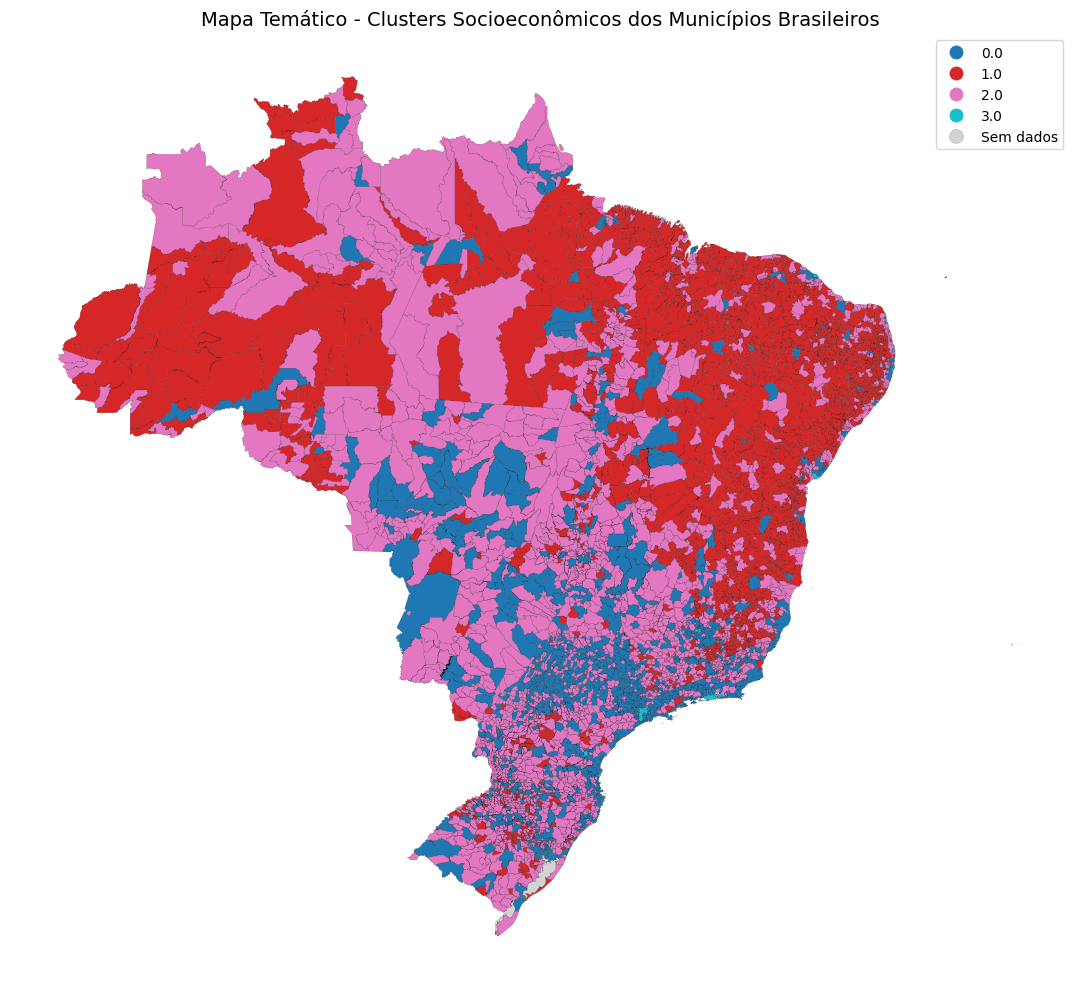

In [11]:
# @title Gerando o Mapa Temático

# Carregar o mapa
try:
    # Tentar ler shapefile
    shp_file = None
    for root, dirs, files in os.walk('mapa_br'):
        for file in files:
            if file.endswith('.shp'):
                shp_file = os.path.join(root, file)
                break
    if shp_file:
        gdf = gpd.read_file(shp_file)
    else:
        # Se não achar shapefile, tentar GeoJSON
        gdf = gpd.read_file('mapa_br.geojson')
except:
    # Se tudo falhar, criar um mapa simplificado
    print("Não foi possível carregar o mapa completo. Gerando mapa simplificado...")
    # Criar um GeoDataFrame com coordenadas aproximadas das capitais
    capitais = {
        'nome': ['São Paulo', 'Rio de Janeiro', 'Brasília', 'Salvador', 'Fortaleza'],
        'cluster': [0, 1, 3, 2, 2],
        'latitude': [-23.55, -22.90, -15.78, -12.97, -3.71],
        'longitude': [-46.63, -43.17, -47.93, -38.51, -38.54]
    }
    import geopandas as gpd
    from shapely.geometry import Point
    gdf = gpd.GeoDataFrame(capitais, geometry=gpd.points_from_xy(capitais['longitude'], capitais['latitude']))
    gdf.crs = "EPSG:4326"

# Preparar junção dos dados
if 'CD_MUN' in gdf.columns:
    # Se for shapefile do IBGE
    gdf['CD_MUN'] = gdf['CD_MUN'].astype(str).str[:7]
    gdf_final = gdf.merge(df_total[['id', 'cluster', 'nome_cidade']],
                          left_on='CD_MUN', right_on='id', how='left')
else:
    # Se for mapa alternativo, mostrar pontos
    gdf_final = gdf.copy()

# Plotar mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

if 'geometry' in gdf_final.columns and gdf_final.geometry.geom_type.iloc[0] in ['Polygon', 'MultiPolygon']:
    # Se for mapa de polígonos
    gdf_final.plot(column='cluster', cmap='tab10', linewidth=0.1, ax=ax,
                   edgecolor='black', legend=True, categorical=True,
                   missing_kwds={'color': 'lightgrey', 'label': 'Sem dados'})
    ax.set_title('Mapa Temático - Clusters Socioeconômicos dos Municípios Brasileiros', fontsize=14)
else:
    # Se for mapa de pontos (fallback)
    cores = ['red', 'blue', 'green', 'purple', 'orange', 'brown']
    for cluster in range(NUM_CLUSTERS):
        pontos = gdf_final[gdf_final['cluster'] == cluster]
        if not pontos.empty:
            pontos.plot(ax=ax, color=cores[cluster % len(cores)],
                       markersize=50, label=f'Cluster {cluster}')
    ax.set_title('Distribuição dos Clusters (Pontos representam cidades)', fontsize=14)
    ax.legend()

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [12]:
# @title Resumo Executivo

print("=" * 80)
print("RESUMO EXECUTIVO - ANÁLISE DE CLUSTERS")
print("=" * 80)

# Caracterização dos clusters
print("\nCARACTERIZAÇÃO DOS CLUSTERS ENCONTRADOS:\n")

for cluster in range(NUM_CLUSTERS):
    dados_cluster = df_total[df_total['cluster'] == cluster]

    print(f"Cluster {cluster}: {len(dados_cluster)} cidades")
    print(f"  • PIB per capita médio: R$ {dados_cluster['pib_per_capita'].mean():,.2f}")
    print(f"  • Desemprego médio: {dados_cluster['porcentagem_desemprego'].mean():.2f}%")
    print(f"  • Ensino Superior completo: {dados_cluster['superior_completo'].mean():.2f}%")
    print(f"  • Sem instrução: {dados_cluster['sem_instrucao_e_fundamental_incompleto'].mean():.2f}%")
    print(f"  • Densidade populacional: {dados_cluster['densidade_populacional'].mean():.2f} hab/km²")
    print()

# Salvar resultados para apresentação
df_total.to_csv('resultados_clusters.csv', index=False)
print("\nResultados salvos em 'resultados_clusters.csv'")

RESUMO EXECUTIVO - ANÁLISE DE CLUSTERS

CARACTERIZAÇÃO DOS CLUSTERS ENCONTRADOS:

Cluster 0: 1059 cidades
  • PIB per capita médio: R$ 67,133.83
  • Desemprego médio: 26.34%
  • Ensino Superior completo: 15.82%
  • Sem instrução: 31.24%
  • Densidade populacional: 229.31 hab/km²

Cluster 1: 2178 cidades
  • PIB per capita médio: R$ 17,942.71
  • Desemprego médio: 57.41%
  • Ensino Superior completo: 6.73%
  • Sem instrução: 54.37%
  • Densidade populacional: 32.42 hab/km²

Cluster 2: 2292 cidades
  • PIB per capita médio: R$ 40,194.58
  • Desemprego médio: 35.03%
  • Ensino Superior completo: 10.37%
  • Sem instrução: 43.66%
  • Densidade populacional: 40.79 hab/km²

Cluster 3: 41 cidades
  • PIB per capita médio: R$ 54,055.05
  • Desemprego médio: 27.72%
  • Ensino Superior completo: 19.92%
  • Sem instrução: 22.56%
  • Densidade populacional: 5833.86 hab/km²


Resultados salvos em 'resultados_clusters.csv'
